# Experiments on Cellular Automaton

In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

# 1D Cellular Automata

Inspired by https://ipython-books.github.io/122-simulating-an-elementary-cellular-automaton/

In [170]:
import torch
import torch.nn as nn

v = [1,0,1,0,0]
f = [4,2,1]


m = nn.Conv1d(1,1,3, stride=1,padding = 1,bias = False)
m.weight = torch.nn.Parameter(torch.Tensor([[f]]))

x = torch.Tensor([[v]])
output = m(x)
output

tensor([[[2., 5., 2., 4., 0.]]], grad_fn=<SqueezeBackward1>)

In [230]:
def step(x,rules):

    # Convolve to convert to binary representation with zero padding
    f = [4,2,1]
    m = nn.Conv1d(1,1,3, stride=1,padding = 1,bias = False)
    m.weight = torch.nn.Parameter(torch.Tensor([[f]]))
    output = m(x[None,None,:])
    indexes = torch.squeeze(output.data.type(torch.LongTensor))

    # Transform to dummies
    # Can also use .scatter_ https://discuss.pytorch.org/t/convert-int-into-one-hot-format/507/4
    P = torch.zeros(len(x),8)
    P[torch.arange(0,len(indexes)),indexes] = 1
    
    # Compute next step values
    values = P @ rules
    return values

In [270]:
np.random.binomial(1,p = 0.2,size = (50))

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0])

In [333]:

def make_cellular_automata(size,p_init):

    values = []

    r = np.random.randint(0,2,size = 8)
    rules = torch.Tensor(r)


    init = np.random.binomial(1,p = p_init,size = size)
#     x = torch.zeros(size)
#     x[10] = 1
#     x[25] = 1
#     x
    x = torch.Tensor(init)

    values.append(x)

    for i in range(size):
        x = step(x,rules)
        values.append(x)

    plt.figure(figsize = (8,8))
    plt.imshow(torch.stack(values).numpy())
    plt.show()

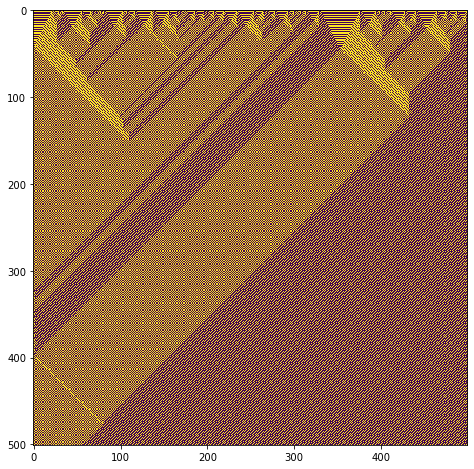

In [355]:
size = 500
p_init = 0.1

make_cellular_automata(size,p_init)